In [38]:
import pandas
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # To plot 3D surfaces
from matplotlib import cm 
import matplotlib
matplotlib.rcParams['text.usetex'] = True  # Allows to use latex in labels

from sklearn.linear_model import LinearRegression

advertising = pandas.read_csv('../data/Advertising.csv')
advertising.info()
advertising.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


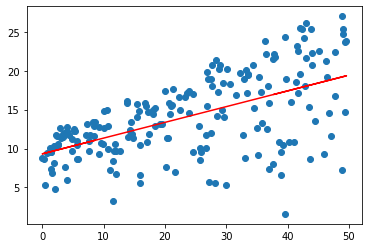

In [39]:
X = advertising['radio'].to_numpy().reshape(-1, 1) # reshape the data as a column vector
Y = advertising['sales'].to_numpy().reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class LinearRegression
linear_regressor.fit(X, Y)  # fit the linear regression
Y_pred = linear_regressor.predict(X)  # make the predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [40]:

#c) If and additional $1,000 spent on Radio advertising.
# How many additional more units of the product we expect to sell.
linear_regressor.predict([[1000]])

print(linear_regressor.predict([[1000]]))

[[211.80742149]]


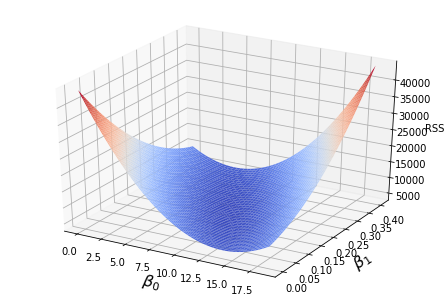

In [41]:
b0, b1 = linear_regressor.intercept_, linear_regressor.coef_

fig = plt.figure()
ax = Axes3D(fig)


q4X = numpy.linspace(0.,2*b0[0], 500)
q4Y = numpy.linspace(0.,2*b1[0][0], 500)
q4X, q4Y = numpy.meshgrid(q4X, q4Y)
Z = []
it_for_bs = zip(q4X, q4Y)
for b0, b1 in it_for_bs:
    sum = 0
    it = zip(X, Y)
    for x,y in it:
        sum += (y - b0 - x*b1)**2
    Z.append(sum)
Z = numpy.array(Z)

surf = ax.plot_surface(q4X, q4Y, Z, cmap=cm.coolwarm)
ax.set_xlabel(r'$\beta_0$', fontsize=16)
ax.set_ylabel(r'$\beta_1$', fontsize=16)
ax.set_zlabel('RSS')

# Customize the z axis.
# adjust this if necessary

plt.show()

